# Wahrscheinlichkeitsverteilungen Übersicht

## Inhaltsverzeichnis

- **diskrete Verteilungen:**
    - [Bernoulliverteilung](#bernoulliverteilung)
    - [Binomialverteilung](#binomialverteilung)
    - [Poissonverteilung](#poissonverteilung)
    - [Negative Binomialverteilung](#negative-binomialverteilung)
    - [Geometrische Verteilung](#geometrische-verteilung)
    - [Hypergeometrische Verteilung](#hypergeometrische-verteilung)
- **kontinuierliche Verteilungen:**
    - [Gammaverteilung](#gammaverteilung)
    - [Exponentialverteilung](#exponentialverteilung)
    - [Normalverteilung](#normalverteilung)



## Diskrete Verteilungen 

### Bernoulliverteilung <a class="anchor" id="bernoulliverteilung"></a>

Durchführung eines Bernoulli-Experiments, welches die zwei Ergebnisse Misserfolg (0) bzw. Erfolg (1) besitzt

**Wahrscheinlichkeitsfunktion (probabillity mass function):**

$f (x) = \left\{
\begin{array}{ll}
p^{x}\cdot(1-p)^{(1-x)}&, \ x = 0, \ 1 \\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [1]:
from scipy.stats import bernoulli
import numpy as np

p = 0.6
b  = bernoulli(p)

In [2]:
b.pmf(0), b.pmf(1)

(0.4, 0.6)

In [3]:
x = np.arange(-0.5, 2, 0.5)
pmf = np.array(b.pmf(x))

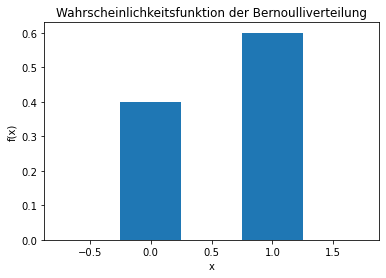

In [4]:
from matplotlib import pyplot as plt

plt.bar(x, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = p$

In [5]:
b.expect()

0.6

**Varianz:**

*allgemein:* $Var(X) = E(x^{2})-(E(x))^{2}$

$Var(X)=p\cdot(1-p)$

In [6]:
b.var()

0.24

**Standardabweichung:**

*allgemein:* $\sigma = \sqrt{Var(X)}$

$\sigma = \sqrt{p\cdot(1-p)}$

In [7]:
b.std()

0.4898979485566356

**Vereilungsfunktion (cumulative distribution function):**

$F_{X}(x) = P(X \le x)$

$F_{X}(x) = \left\{
\begin{array}{ll}
0 &, \ x < 0 \\
1-p &, \ 0 \le x \le 1 \\
1 &, \ x \ge 1 \\
\end{array}
\right. $

In [8]:
x = np.arange(-0.5, 1.5, 0.01)
cdf = np.array(b.cdf(x))

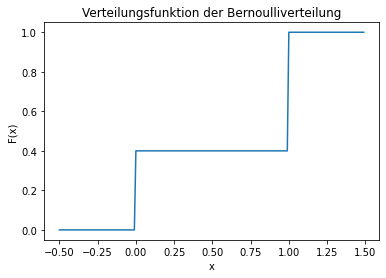

In [9]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Bernoulliverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Binomialverteilung <a class="anchor" id="binomialverteilung"></a>

Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*

**Wahrscheinlichkeitsfunktion:**

$f_{p, \ n}(k)= \left\{
\begin{array}{ll}
\binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}  &, \  0 \le k \le n\\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $

In [10]:
from scipy.stats import binom

n = 10
p = 0.5

k = np.arange(0, n+1)
pmf = np.array(binom.pmf(k, n, p))

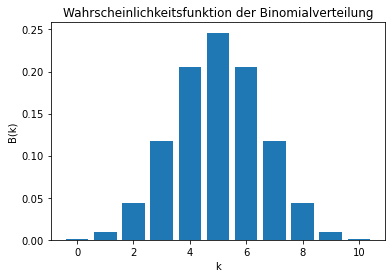

In [11]:
plt.bar(k, pmf)
plt.title("Wahrscheinlichkeitsfunktion der Binomialverteilung")
plt.xlabel("k")
plt.ylabel("B(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot p$

In [12]:
bino = binom(n, p)
bino.expect()

5.000000000000005

**Varianz:**

$Var(X) = n \cdot p \cdot (1-p)$

In [13]:
bino.var()

2.5

**Standardabweichung:**

$\sigma = \frac{\sqrt{n}}{2}$

In [14]:
bino.std()

1.5811388300841898

**Verteilungsfunktion:**

$F_{X}(x)= \sum_{k=0}^{|x|} \binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}$

In [15]:
k = np.arange(0, n, 0.01)
cdf = np.array(binom.cdf(k, n, p))

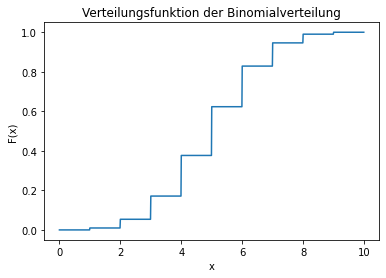

In [16]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der Binomialverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Poissonverteilung <a class="anchor" id="poissonverteilung"></a>

Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*, welche in einem zeitlichen oder räumlichen Beobachtungsintervall stattfinden 

**Wahrscheinlichkeitsfunktion:**

$f_{\lambda}(k)=\frac{\lambda^{k}}{k!}e^{-\lambda}$ mit $\lambda = n \cdot p_{n}$

In [131]:
from scipy.stats import poisson

lam = 5
n = 12

k = np.arange(0, n+1)
pmf = np.array(poisson.pmf(k, lam))

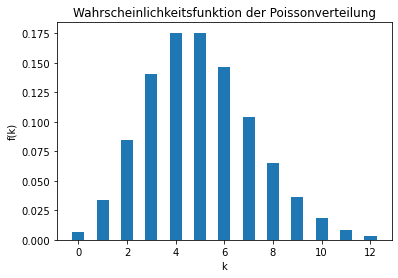

In [132]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.show()

**Erwartungswert:**

$E(X)=\lambda$

In [133]:
poi = poisson(lam)
poi.expect()

4.9999999999999964

**Varianz:**

$Var(X)=\lambda$

In [134]:
poi.var()

5.0

**Standartabweichung:**

$\sigma = \sqrt{\lambda}$

In [135]:
poi.std()

2.23606797749979

**Verteilungsfunktion:**

$F_{\lambda}(n)=\sum_{k=0}^{n}P_{\lambda}(k) = p_{n}$

In [136]:
k = np.arange(0, n, 0.01)
cdf = np.array(poisson.cdf(k, lam))

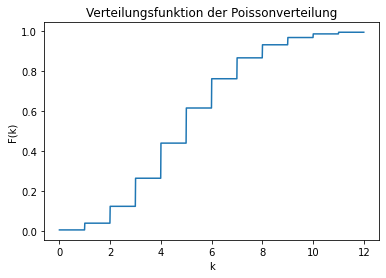

In [137]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der Poissonverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Negative Binomialverteilung <a class="anchor" id="negative-binomialverteilung"></a>

Gibt die Wartezeit bis zum *r-ten* Erfolg im *Binomialmodel*(Wiederholung von unabhängigen *Bernouli-Experimenten*) an

**Wahrscheinlichkeitsfunktion:**

$f_{r,\ p}(k) = \binom{r+k-1}{k} \cdot p^{r} \cdot (1-p)^{r} = \binom{-r}{k}+p^{r} \cdot (1-p)^{k}$

In [138]:
from  scipy.stats import nbinom

n = 5
r = 0.4
p = 0.4

k = np.arange(0, n+1)
pmf = np.array(nbinom.pmf(k, r, p))

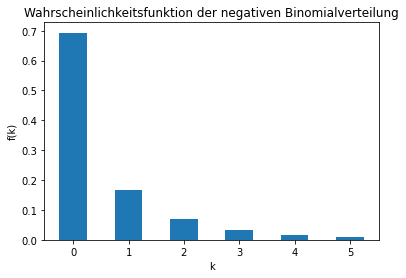

In [139]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("f(k)")
plt.show()

**Erwartungswert:**

$E(X)=\frac{r \ \cdot \ (1-p)}{p}$

In [140]:
nbino = nbinom(r,p)
nbino.expect()

0.6

**Varianz:**

$Var(X)=\frac{r \ \cdot \ (1-p)}{p^{2}}$

In [141]:
nbino.var()

1.5000000000000002

**Standardabweichung:**

$\sigma=\frac{\sqrt{r \ \cdot \ (1-p)}}{p}$

In [142]:
nbino.std()

1.2247448713915892

**Verteilungsfunktion:**

$F_{r, \ p}(k) = \sum_{k = 0}^{\infty}\binom{-r}{k} \cdot p^{r} \cdot (1-p)^{k}$

In [143]:
k = np.arange(0, n, 0.01)
cdf = np.array(nbinom.cdf(k, r, p))

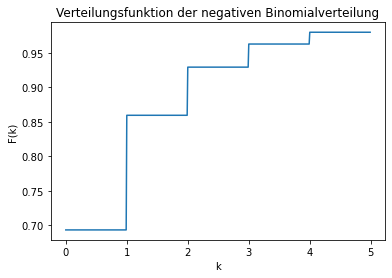

In [144]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der negativen Binomialverteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Geometrische Verteilung <a class="anchor" id="geometrische-verteilung"></a>

Spezialfall der *negativen Binomialverteilung*: Gibt Wartezeit bis zum *ersten* Erfolg im *Binomialmodel* an

**Wahrscheinlichkeitsfunktion:**

$f_{1,\ p}(k)=f_{p}(k)= p \cdot (1-p)^{k}$

In [31]:
from scipy.stats import geom

p = 0.5
n = 6

k = np.arange(1, n+1)
pmf = np.array(geom.pmf(k, p))

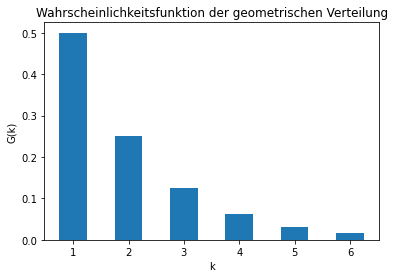

In [32]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("G(k)")
plt.show()

**Erwartungswert:**

$E(X)= \frac{1}{p}$

In [33]:
geo = geom(p)
geo.expect()

2.0

**Varianz:**

$Var(X) = \frac{1-p}{p^{2}}$

In [34]:
geo.var()

2.0

**Standardabweichung:**

$\sigma = \frac{\sqrt{1-p}}{p}$

In [35]:
geo.std()

1.4142135623730951

**Verteilungsfunktion:**

$F_{p}(k) = \sum_{i=1}^{k}p \cdot (1-p)^{i-1} = 1-(1-p)^{k}$

In [36]:
k = np.arange(1, n, 0.01)
cdf = np.array(geom.cdf(k, p))

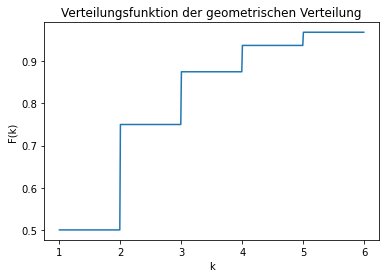

In [37]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der geometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("F(k)")
plt.show()

### Hypergeometrische Verteilung <a class="anchor" id="hypergeometrische-verteilung"></a>

Durchführung einer Stichprobe von *n* Elementen, durch ziehen ohne Zurücklegen gibt Auskunft über bestimmte Anzahl *k* von gezogenen Elementen

**Wahrscheinlichkeitsverteilung:**

$h_{M, n, N}(k) = \frac{\binom{M}{k} \binom{N-M}{n-k}}{\binom{N}{n}}$

In [38]:
from scipy.stats import hypergeom

[M, n, N] = [20, 7, 12]

k = np.arange(0, n+1)
pmf = np.array(hypergeom.pmf(k, M, n, N))

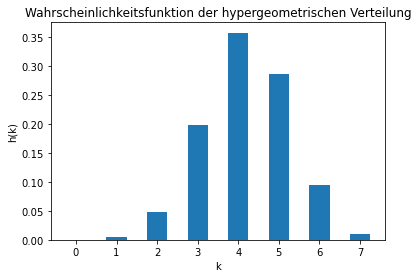

In [39]:
plt.bar(k, pmf, width=0.5)
plt.title("Wahrscheinlichkeitsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("h(k)")
plt.show()

**Erwartungswert:**

$E(X) = n \cdot \frac{M}{N}$

In [40]:
hypergeo = hypergeom(M, n, N)
hypergeo.expect()

4.199999999999995

**Varianz:**

$Var(X) = n \cdot \frac{M}{N} \cdot (1- \frac{M}{N}) \cdot \frac{N-n}{N-1}$

In [41]:
hypergeo.var()

1.1494736842105264

**Verteilungsfunktion:**

$H_{M, n, M}(k) = \sum_{i = 0}^{k} \frac{\binom{M}{i} \cdot \binom{N-M}{n-y}}{\binom{N}{n}}$

In [42]:
k = np.arange(0, n, 0.01)
cdf = np.array(hypergeom.cdf(k, M, n, N))

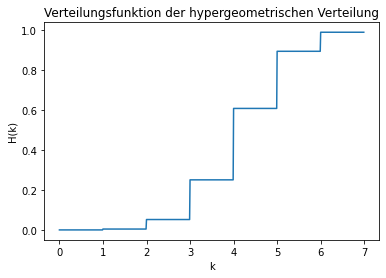

In [43]:
plt.plot(k, cdf)
plt.title("Verteilungsfunktion der hypergeometrischen Verteilung")
plt.xlabel("k")
plt.ylabel("H(k)")
plt.show()

## Kontinuierliche Verteilungen

### Gammaverteilung <a class="anchor" id="gammaverteilung"></a>

Gibt die Wartezeit auf den *r-ten* Schadensfall an

**Dichtefunktion:**

$f_{\alpha, r}(x) = \left\{
\begin{array}{ll}
\frac{\alpha^{r}}{\Gamma(r)}x^{r-1} e^{-\alpha \cdot r}  &, \ für \ x > 0\\
0 &, \ für \ x \le 0\\
\end{array}
\right. \\ mit \ \Gamma(r) = (r-1)!$

In [113]:
from scipy.stats import gamma

[n, a, r ] = [6, 1, 2]

x = np.arange(0, n, 0.01)
gam = gamma(r, 0, a)
pdf = np.array(gam.pdf(x))

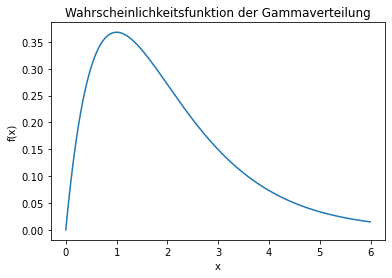

In [114]:
plt.plot(x, pdf)
plt.title("Wahrscheinlichkeitsfunktion der Gammaverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = \frac{r}{\alpha}$

In [115]:
gam.expect()

2.0

**Varianz:**

$Var(X) = \frac{r}{\alpha^{2}}$

In [116]:
gam.var()

2.0

**Standardabweichung:**

$\sigma =\frac{\sqrt{r}}{\alpha}$ 

In [117]:
gam.std()

1.4142135623730951

**Verteilungsfunktion:**

$F_{\alpha, r}(x) =\frac{\alpha^{r}}{\Gamma(r)}\int_{0}^{x}u^{r-1} \cdot e^{-\alpha \cdot u} du$

In [118]:
cdf = gam.cdf(x)

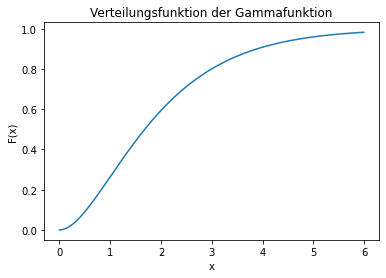

In [119]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Gammafunktion")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Exponentialverteilung <a class="anchor" id="exponentialverteilung"></a>

Spezialfall der *Gammaverteilung*: Gibt die Wartezeit bis zum *ersten* Schadensfall an

**Dichtefunktion (probability density function):**

$f_{\alpha, 1}(x)= f_{\lambda}(x)= \left\{
\begin{array}{ll}
\lambda \cdot e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x \ < \ 0\\
\end{array}
\right. $

In [120]:
from scipy.stats import expon

n = 6
lamb = 1

exp = expon(scale=1/lamb)

x = np.arange(0, n, 0.01)
pdf = np.array(exp.pdf(x))

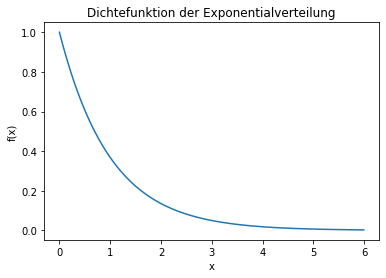

In [121]:
plt.plot(x, pdf)
plt.title("Dichtefunktion der Exponentialverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Erwartungswert:**

$E(X) = \frac{1}{\lambda}$

In [122]:
exp.expect()

0.9999999999999998

**Varianz:**

$Var(X) = \frac{1}{\lambda^{2}}$

In [123]:
exp.var()

1.0

**Standardabweichung:**

$\sigma = \frac{1}{\lambda}$

In [124]:
exp.std()

1.0

**Verteilungsfunktion:**

$F_{\lambda}(x) = \int_{0}^{x}f_{\lambda}(t)dt = \left\{
\begin{array}{ll}
1- e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x  \ < \ 0\\
\end{array}
\right. $

In [125]:
cdf = exp.cdf(x)

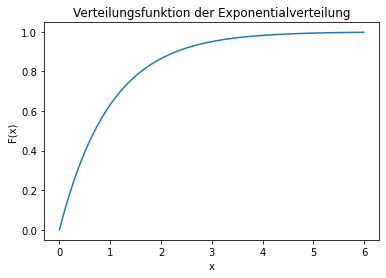

In [126]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Exponentialverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### Normalverteilung <a class="anchor" id="normalverteilung"></a>

**Dichtefunktion:**

$f_{ \mu,\sigma^{2}}(x)=\frac{1}{\sqrt{2 \pi \cdot \sigma^{2}}} \cdot e^{- \frac{(x - \mu)^{2}}{2 \cdot \sigma^{2}}}$
mit *Erwartungswert:* $-\infty <\mu < \infty$, *Varianz:* $ \sigma^{2} > 0$ und *x:* $-\infty <x < \infty$

In [127]:
from scipy.stats import norm

[mu, var, n] = [4, 1, 8]

x = np.arange(0, n, 0.01)
pdf = np.array(norm.pdf(x, mu, var))

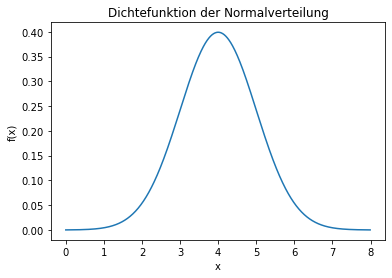

In [128]:
plt.plot(x, pdf)
plt.title("Dichtefunktion der Normalverteilung")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

**Verteilungsfunktion:**

$F_{\mu,\sigma^{2}}(x)=\int_{-\infty}^{x}f_{\mu,\sigma^{2}}(t)dt$

In [129]:
cdf = np.array(norm.cdf(x, mu, var))

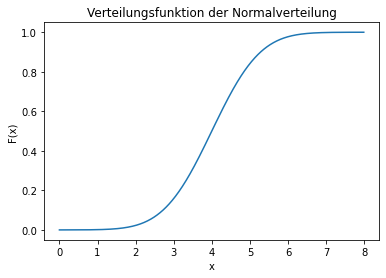

In [130]:
plt.plot(x, cdf)
plt.title("Verteilungsfunktion der Normalverteilung")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()